In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats

data_sales  = pd.read_csv("rossman_sales.csv")
data_store  = pd.read_csv("rossman_store.csv")

df_sales  = pd.DataFrame(data_sales)
df_store  = pd.DataFrame(data_store)

df_sales = df_sales[df_sales['Open'].isin([1])]

C:\Users\sean\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(len(df_store))
print(df_store.columns)
print(df_store.isnull().sum())


isnull_com = df_store.loc[(df_store["CompetitionOpenSinceMonth"].isnull()) & (df_store["CompetitionOpenSinceMonth"].isnull()) , :]
print(isnull_com[['CompetitionOpenSinceMonth','CompetitionOpenSinceMonth']].isnull().sum())

isnull_pro = df_store.loc[(df_store["Promo2SinceWeek"].isnull()) & (df_store["Promo2SinceYear"].isnull()) & (df_store["Promo2SinceYear"].isnull()), :]
print(isnull_pro[['Promo2SinceWeek','Promo2SinceYear','Promo2SinceYear']].isnull().sum())

1115
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
CompetitionOpenSinceMonth    354
CompetitionOpenSinceMonth    354
dtype: int64
Promo2SinceWeek    544
Promo2SinceYear    544
Promo2SinceYear    544
dtype: int64


In [3]:
test_asdf = df_store.loc[(df_store["CompetitionDistance"].isnull()), :]
test_asdf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [4]:
test_qwer = df_store.loc[(df_store["CompetitionOpenSinceYear"].isnull()), :]
print(test_qwer['CompetitionOpenSinceMonth'].unique())
print(test_qwer['CompetitionDistance'].unique())

[nan]
[1.070e+03 3.100e+02 3.270e+03 3.240e+03 1.040e+03 2.300e+03 2.170e+03
 2.910e+03 1.800e+02 1.180e+03 2.900e+02 4.880e+03 2.050e+03 2.256e+04
 7.660e+03 2.500e+02 1.130e+03 4.840e+03 3.300e+02 3.320e+03 7.910e+03
 2.710e+03 2.410e+03 2.400e+02 1.669e+04 1.462e+04 8.980e+03 1.793e+04
 2.440e+03 6.190e+03 7.890e+03 4.510e+03 2.000e+03 2.460e+03 9.000e+02
 5.190e+03 1.540e+03 1.657e+04 2.800e+02 8.540e+03 1.780e+03 1.642e+04
 3.050e+03 1.184e+04 1.254e+04 2.640e+03 1.100e+02 1.309e+04 4.130e+03
 3.770e+03 1.710e+03 4.800e+02 1.390e+03 9.670e+03 3.560e+03 1.936e+04
 8.500e+02 5.200e+02 1.697e+04 2.200e+02 2.026e+04 3.800e+02 6.870e+03
 1.500e+02 1.900e+02 3.150e+03 6.400e+02 7.930e+03 4.500e+02 2.370e+03
 1.080e+04 1.890e+03 4.370e+03 3.200e+02 6.100e+02 7.800e+02 1.310e+03
 3.520e+03 3.400e+02 2.233e+04 2.100e+02 4.580e+03 4.200e+02 8.480e+03
 3.640e+03 7.840e+03 2.320e+03 2.260e+03 1.290e+03 8.000e+02       nan
 8.740e+03 2.290e+03 1.416e+04 1.314e+04 3.700e+02 6.700e+02 9.000e+01


count    8.443920e+05
mean    -3.157246e-15
std      1.000001e+00
min     -2.032222e+01
25%     -6.228192e-01
50%      5.054420e-03
75%      6.362176e-01
max      4.357050e+00
Name: Sales_log, dtype: float64


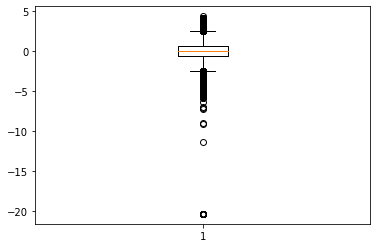

The number of outlier is 13898


In [5]:
import math
from sklearn import preprocessing

df_sales['Sales_log'] = preprocessing.scale(np.log(df_sales['Sales']+1))
print(df_sales['Sales_log'].describe())

plt.boxplot(df_sales['Sales_log'])
plt.show()

quartile_1, quartile_3 = np.percentile(df_sales['Sales_log'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)

outlier_Sales_log = 0
sales_log = df_sales['Sales_log'].tolist()

for i in sales_log:
    if i < lower_bound or i > upper_bound:
        outlier_Sales_log+=1
print("The number of outlier is" , outlier_Sales_log)

In [6]:
temp = df_sales.loc[(df_sales["Sales"] == 0) & (df_sales["Customers"] == 0) , :]
temp

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log
86825,971,5,2015-05-15,0,0,1,0,0,1,-20.322217
142278,674,4,2015-03-26,0,0,1,0,0,0,-20.322217
196938,699,4,2015-02-05,0,0,1,1,0,0,-20.322217
322053,708,3,2014-10-01,0,0,1,1,0,0,-20.322217
330176,357,1,2014-09-22,0,0,1,0,0,0,-20.322217
340348,227,4,2014-09-11,0,0,1,0,0,0,-20.322217
340860,835,4,2014-09-11,0,0,1,0,0,0,-20.322217
341795,835,3,2014-09-10,0,0,1,0,0,0,-20.322217
346232,548,5,2014-09-05,0,0,1,1,0,1,-20.322217
346734,28,4,2014-09-04,0,0,1,1,0,0,-20.322217


In [7]:
temp1 = temp.loc[temp.duplicated(['Store'], keep=False), : ]
temp1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log
340860,835,4,2014-09-11,0,0,1,0,0,0,-20.322217
341795,835,3,2014-09-10,0,0,1,0,0,0,-20.322217
346734,28,4,2014-09-04,0,0,1,1,0,0,-20.322217
347669,28,3,2014-09-03,0,0,1,1,0,1,-20.322217
348604,28,2,2014-09-02,0,0,1,1,0,1,-20.322217
386065,102,4,2014-07-24,0,0,1,0,0,1,-20.322217
397285,102,6,2014-07-12,0,0,1,0,0,0,-20.322217
437311,1017,4,2014-06-05,0,0,1,1,0,0,-20.322217
438426,1017,3,2014-06-04,0,0,1,1,0,0,-20.322217
561199,25,4,2014-02-13,0,0,1,0,0,0,-20.322217


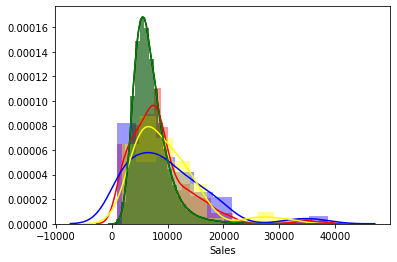

In [8]:
df_sales = df_sales.replace({'StateHoliday': 0}, {'StateHoliday': '0'})

sns.distplot(df_sales["Sales"],color='black',label='type_a')

group1 = df_sales[df_sales['StateHoliday'].isin(['a'])]
sns.distplot(group1["Sales"],color='red',label='type_a')

group2 = df_sales[df_sales['StateHoliday'].isin(['b'])]
sns.distplot(group2["Sales"],color='blue',label='type_b')

group3 = df_sales[df_sales['StateHoliday'].isin(['c'])]
sns.distplot(group3["Sales"],color='yellow',label='type_c')

group4 = df_sales[df_sales['StateHoliday'].isin(['0'])]
sns.distplot(group4["Sales"],color='green',label='type_0')

In [ ]:
df

In [9]:
F_statistic, pVal = stats.f_oneway(group1['Sales'], group2['Sales'], group3['Sales'],group4['Sales'])

print('Result : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Result : F=118.7, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      a 1533.9561  0.001   1231.176 1836.7363   True
     0      b 2934.3746  0.001  2272.1857 3596.5635   True
     0      c 2790.2314  0.001  1843.9558 3736.5071   True
     a      b 1400.4185  0.001   672.3943 2128.4426   True
     a      c 1256.2753 0.0064   262.8154 2249.7352   True
     b      c -144.1432    0.9 -1299.0375 1010.7512  False
----------------------------------------------------------


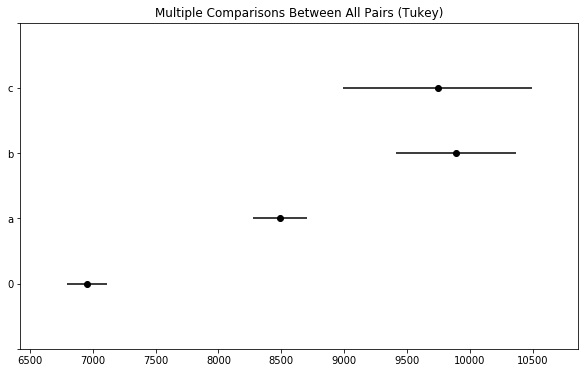

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_sales['Sales'], df_sales['StateHoliday'], alpha=0.05)
print(posthoc)

fig = posthoc.plot_simultaneous()

In [11]:
import warnings
warnings.filterwarnings('ignore')

df_test = pd.DataFrame(df_sales, columns=['Sales', 'StateHoliday'])    

# the "C" indicates categorical data
model = ols('Sales ~ C(StateHoliday)', df_test).fit()

print(anova_lm(model))

                       df        sum_sq       mean_sq          F        PR(>F)
C(StateHoliday)       3.0  3.430915e+09  1.143638e+09  118.73174  7.053545e-77
Residual         844388.0  8.133246e+12  9.632120e+06        NaN           NaN


In [12]:
dummy1 = pd.get_dummies(df_sales['StateHoliday'],prefix='StateHoliday')
df_sales[['StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c']] = dummy1
df_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,0,1,-0.437510,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,-0.108807,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0.623415,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,1.831794,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,-0.640554,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,-1.468336,0,1,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,1.222909,0,1,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,-0.540266,0,1,0,0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,-0.805547,0,1,0,0


In [13]:
dummy2 = pd.get_dummies(df_sales['DayOfWeek'],prefix='DayOfWeek')

df_sales[['DayOfWeek_1','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']] = dummy2
df_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1,5,2015-07-31,5263,555,1,1,0,1,-0.437510,...,0,0,0,0,0,0,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,-0.108807,...,0,0,0,0,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0.623415,...,0,0,0,0,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,1.831794,...,0,0,0,0,0,0,0,1,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,-0.640554,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,-1.468336,...,1,0,0,0,1,0,0,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,1.222909,...,1,0,0,0,1,0,0,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,-0.540266,...,1,0,0,0,1,0,0,0,0,0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,-0.805547,...,1,0,0,0,1,0,0,0,0,0


In [14]:
df_sales = df_sales.reset_index(drop=True)

df = pd.merge(df_sales,df_store,on = ['Store'])
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log,...,DayOfWeek_7,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,-0.437510,...,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,-0.547188,...,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,-0.659881,...,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,-0.551351,...,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,-0.094313,...,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,1,0,0,0.881221,...,0,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
844388,292,6,2013-01-05,2748,340,1,0,0,0,-1.945120,...,0,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
844389,292,5,2013-01-04,4202,560,1,0,0,1,-0.959868,...,0,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
844390,292,4,2013-01-03,4580,662,1,0,0,1,-0.760018,...,0,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN


In [15]:
dummy3 = pd.get_dummies(df['Assortment'],prefix='Assortment')

df[['Assortment_a','Assortment_b','Assortment_c']] = dummy3
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,0,1,-0.437510,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,-0.547188,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,-0.659881,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,-0.551351,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,-0.094313,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,1,0,0,0.881221,...,1100.0,6.0,2009.0,0,NaN,NaN,NaN,1,0,0
844388,292,6,2013-01-05,2748,340,1,0,0,0,-1.945120,...,1100.0,6.0,2009.0,0,NaN,NaN,NaN,1,0,0
844389,292,5,2013-01-04,4202,560,1,0,0,1,-0.959868,...,1100.0,6.0,2009.0,0,NaN,NaN,NaN,1,0,0
844390,292,4,2013-01-03,4580,662,1,0,0,1,-0.760018,...,1100.0,6.0,2009.0,0,NaN,NaN,NaN,1,0,0


In [16]:
dummy4 = pd.get_dummies(df['StoreType'],prefix='StoreType')

df[['StoreType_a','StoreType_b','StoreType_c','StoreType_d']] = dummy4
df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Assortment_a,Assortment_b,Assortment_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,1,5,2015-07-31,5263,555,1,1,0,1,-0.437510,...,NaN,NaN,NaN,1,0,0,0,0,1,0
1,1,4,2015-07-30,5020,546,1,1,0,1,-0.547188,...,NaN,NaN,NaN,1,0,0,0,0,1,0
2,1,3,2015-07-29,4782,523,1,1,0,1,-0.659881,...,NaN,NaN,NaN,1,0,0,0,0,1,0
3,1,2,2015-07-28,5011,560,1,1,0,1,-0.551351,...,NaN,NaN,NaN,1,0,0,0,0,1,0
4,1,1,2015-07-27,6102,612,1,1,0,1,-0.094313,...,NaN,NaN,NaN,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,1,0,0,0.881221,...,NaN,NaN,NaN,1,0,0,1,0,0,0
844388,292,6,2013-01-05,2748,340,1,0,0,0,-1.945120,...,NaN,NaN,NaN,1,0,0,1,0,0,0
844389,292,5,2013-01-04,4202,560,1,0,0,1,-0.959868,...,NaN,NaN,NaN,1,0,0,1,0,0,0
844390,292,4,2013-01-03,4580,662,1,0,0,1,-0.760018,...,NaN,NaN,NaN,1,0,0,1,0,0,0


In [17]:
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(0)
df_store['CompetitionDistance'] = df_store['CompetitionDistance'].fillna(0)

In [18]:
df_store['Sales_mean'] = df['Sales'].groupby(df['Store']).mean()
Sales_mean = df_store['Sales_mean'].tolist()
del Sales_mean[0] 
Sales_mean.append(6302.469910)
df_store['Sales_mean'] = Sales_mean

df_store['Sales_median'] = df['Sales'].groupby(df['Store']).median()
Sales_median = df_store['Sales_median'].tolist()
del Sales_median[0] 
Sales_median.append(6126.0)
df_store['Sales_median'] = Sales_median



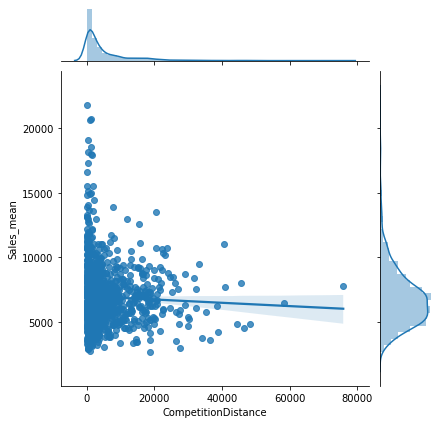

In [19]:
sns.jointplot(x=df_store['CompetitionDistance'],y=df_store['Sales_mean'],kind='reg')

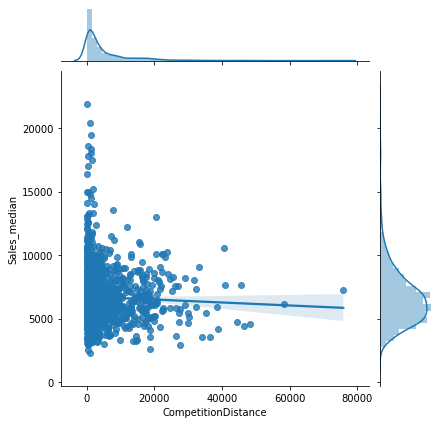

In [20]:
sns.jointplot(x=df_store['CompetitionDistance'],y=df_store['Sales_median'],kind='reg')

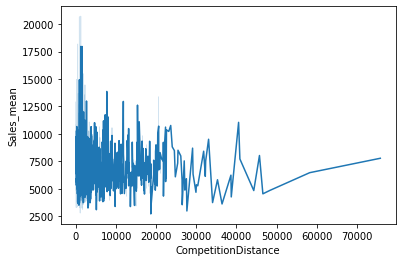

In [21]:
sns.lineplot(x=df_store['CompetitionDistance'],y=df_store['Sales_mean'])

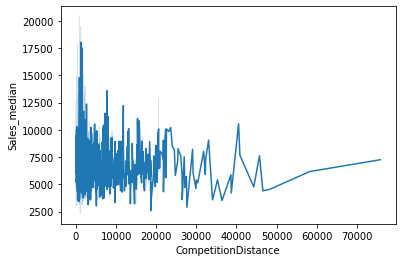

In [22]:
sns.lineplot(x=df_store['CompetitionDistance'],y=df_store['Sales_median'])

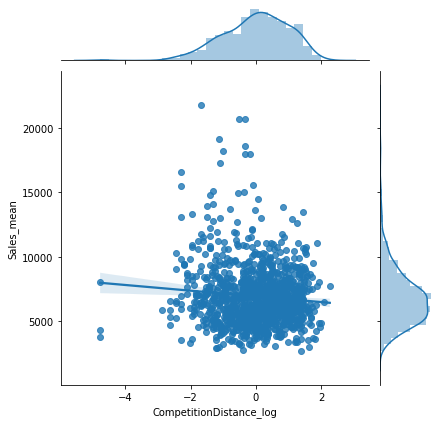

In [23]:
df_store['CompetitionDistance_log'] = preprocessing.scale(np.log(df_store['CompetitionDistance']+1))

sns.jointplot(x=df_store['CompetitionDistance_log'],y=df_store['Sales_mean'],kind='reg')


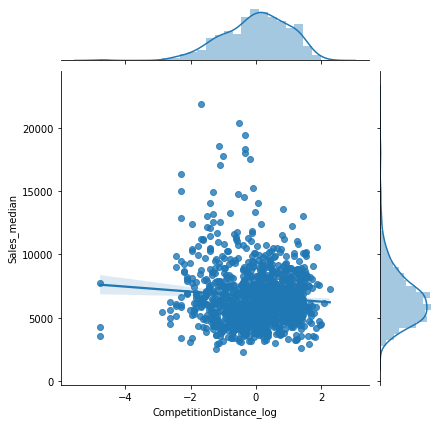

In [24]:
sns.jointplot(x=df_store['CompetitionDistance_log'],y=df_store['Sales_median'],kind='reg')

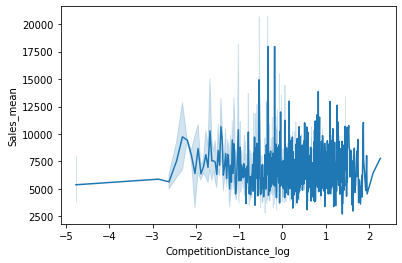

In [25]:
sns.lineplot(x=df_store['CompetitionDistance_log'],y=df_store['Sales_mean'])

2186
842206


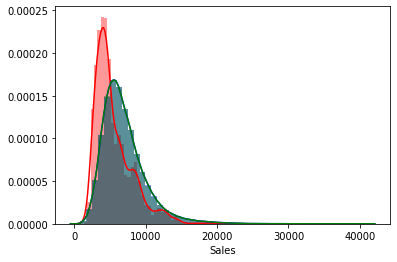

In [26]:
group1 = df.loc[(df["CompetitionDistance"]==0) , :]
group2 = df.loc[(df["CompetitionDistance"]!=0) , :]


sns.distplot(group1["Sales"],color='red',label='IsntCompetitionDistance')


sns.distplot(group2["Sales"],color='blue',label='IsCompetitionDistance')


sns.distplot(df["Sales"],color='green',label='total')

print(len(group1))
print(len(group2))

{'whiskers': [<matplotlib.lines.Line2D at 0x184d91cce88>,
 'caps': [<matplotlib.lines.Line2D at 0x184d930cfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x184d91cc388>],
 'medians': [<matplotlib.lines.Line2D at 0x184d9311f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x184d9315948>],
 'means': []}

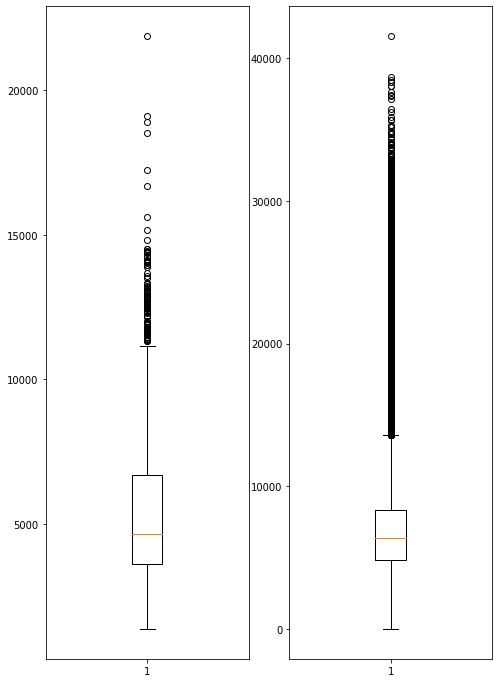

In [27]:
plt.figure(figsize=(8,12))

plt.subplot(121)
plt.boxplot(group1['Sales'])

plt.subplot(122)
plt.boxplot(group2['Sales'])

In [28]:
from sklearn.preprocessing import minmax_scale

group1['Sales_minmax'] = minmax_scale(group1['Sales'] , axis=0, copy=True)

group2['Sales_minmax'] = minmax_scale(group2['Sales'] , axis=0, copy=True)

Text(0.5, 1.0, 'Is CompetitionDistance')

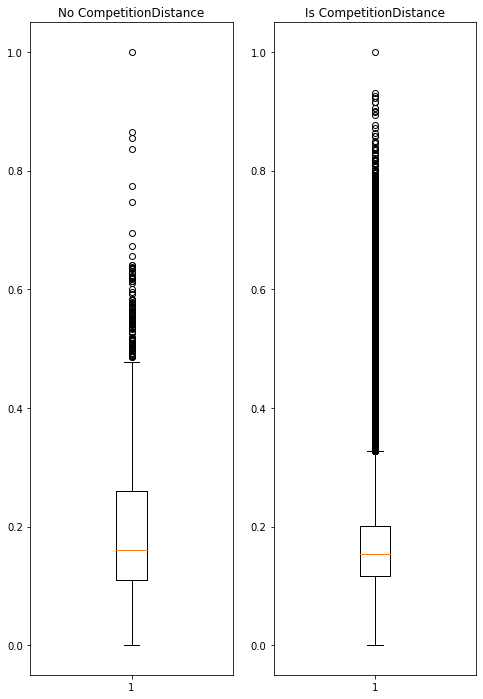

In [29]:
plt.figure(figsize=(8,12))

plt.subplot(121)
plt.boxplot(group1['Sales_minmax'])
plt.title('No CompetitionDistance')

plt.subplot(122)
plt.boxplot(group2['Sales_minmax'])
plt.title('Is CompetitionDistance')

In [30]:
"""
from scipy import stats

group1['Sales_z'] = stats.zscore(group1['Sales'])
group1=group1[group1['Sales_z'].between(-1.96,1.96)]
group1

group2['Sales_z'] = stats.zscore(group2['Sales'])
group2=group2[group2['Sales_z'].between(-1.96,1.96)]
group2
"""

"\nfrom scipy import stats\n\ngroup1['Sales_z'] = stats.zscore(group1['Sales'])\ngroup1=group1[group1['Sales_z'].between(-1.96,1.96)]\ngroup1\n\ngroup2['Sales_z'] = stats.zscore(group2['Sales'])\ngroup2=group2[group2['Sales_z'].between(-1.96,1.96)]\ngroup2\n"

In [31]:
F_statistic, pVal = stats.f_oneway(group1['Sales_minmax'], group2['Sales_minmax'])
                                  

print('Result : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Result : F=429.3, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [32]:
F_statistic, pVal = stats.f_oneway(group1['Sales'], group2['Sales'])
                                  

print('Result : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Result : F=494.1, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [33]:
"""
F_statistic, pVal = stats.f_oneway(group1['Sales_z'], group2['Sales_z'])
                                  

print('Result : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')
"""

"\nF_statistic, pVal = stats.f_oneway(group1['Sales_z'], group2['Sales_z'])\n                                  \n\nprint('Result : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))\nif pVal < 0.05:\n    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')\n"

In [34]:
df['IsCompetitionDistance'] = 1

df['IsCompetitionDistance'] = df["CompetitionDistance"].apply(lambda x: 0 if x == 0 else 1)

In [35]:
df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].fillna(0)
df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].fillna(0)

df_store['CompetitionTotal'] = 0

for i in range(len(df_store)):
    if(df_store['CompetitionOpenSinceYear'][i] ==  df_store['CompetitionOpenSinceMonth'][i] == 0):
        df_store['CompetitionTotal'][i] = 0
    else:
        df_store['CompetitionTotal'][i] = 12 * (2015- df_store['CompetitionOpenSinceYear'][i]) + (12-df_store['CompetitionOpenSinceMonth'][i])

df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales_mean,Sales_median,CompetitionDistance_log,CompetitionTotal
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4759.096031,4647.0,-0.298464,87
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4953.900510,4783.0,-0.798803,97
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",6942.568678,6619.0,1.207592,108
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,9638.401786,9430.5,-0.746315,75
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,4676.274711,4616.0,1.676470,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",5251.702182,5028.0,-0.046736,18
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,10236.577664,9410.0,-0.053350,116
1112,1113,a,c,9260.0,0.0,0.0,0,NaN,NaN,NaN,6627.859694,6354.5,0.943370,0
1113,1114,a,c,870.0,0.0,0.0,0,NaN,NaN,NaN,20666.562500,20412.5,-0.534772,0


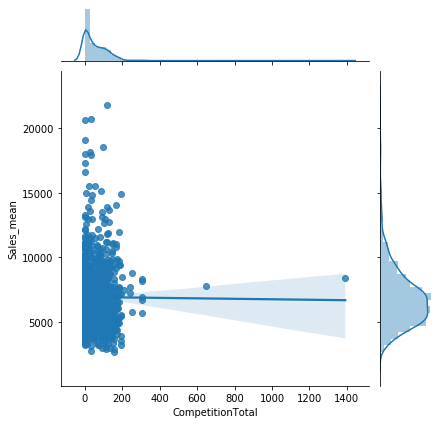

In [36]:
sns.jointplot(x=df_store['CompetitionTotal'],y=df_store['Sales_mean'],kind='reg')

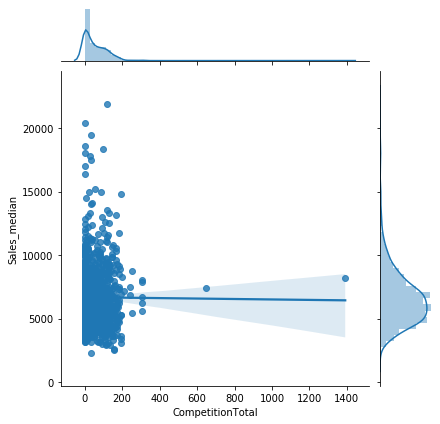

In [37]:
sns.jointplot(x=df_store['CompetitionTotal'],y=df_store['Sales_median'],kind='reg')

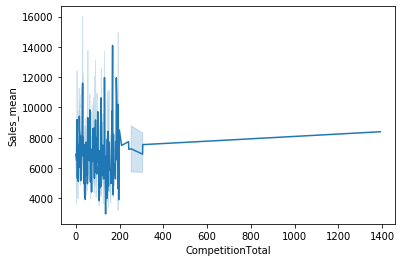

In [38]:
sns.lineplot(x=df_store['CompetitionTotal'],y=df_store['Sales_mean'])

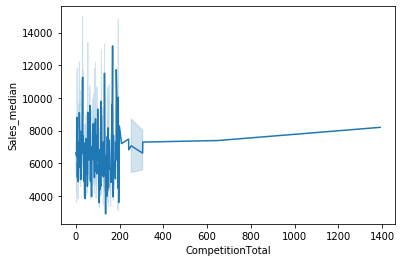

In [39]:
sns.lineplot(x=df_store['CompetitionTotal'],y=df_store['Sales_median'])

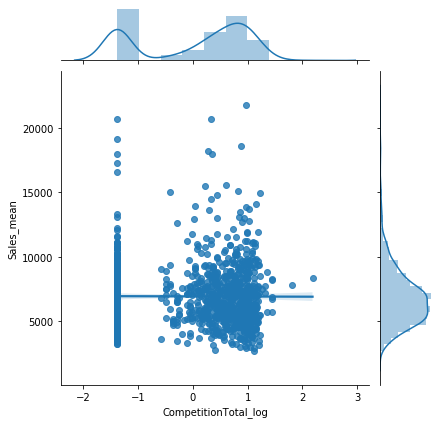

In [40]:
df_store['CompetitionTotal_log'] = preprocessing.scale(np.log(df_store['CompetitionTotal']+1))

sns.jointplot(x=df_store['CompetitionTotal_log'],y=df_store['Sales_mean'],kind='reg')

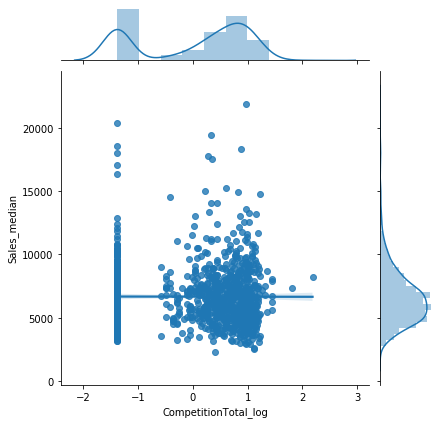

In [41]:
sns.jointplot(x=df_store['CompetitionTotal_log'],y=df_store['Sales_median'],kind='reg')

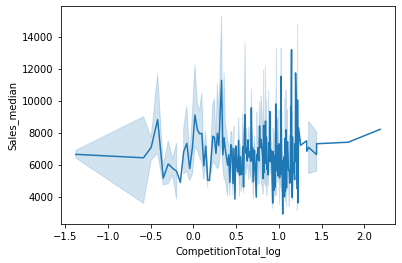

In [42]:
sns.lineplot(x=df_store['CompetitionTotal_log'],y=df_store['Sales_median'])

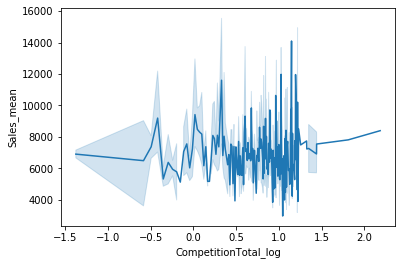

In [43]:
sns.lineplot(x=df_store['CompetitionTotal_log'],y=df_store['Sales_mean'])

In [44]:
test_qwer =  df_store.loc[(df_store["CompetitionTotal"]!=0) , :]

from scipy import stats

test_qwer['CompetitionTotal_log_z'] = stats.zscore(test_qwer['CompetitionTotal_log'])
test_qwer=test_qwer[test_qwer['CompetitionTotal_log_z'].between(-1.96,1.96)]
test_qwer

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales_mean,Sales_median,CompetitionDistance_log,CompetitionTotal,CompetitionTotal_log,CompetitionTotal_log_z
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4759.096031,4647.0,-0.298464,87,0.826577,0.447933
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4953.900510,4783.0,-0.798803,97,0.879558,0.575617
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",6942.568678,6619.0,1.207592,108,0.931922,0.701818
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,9638.401786,9430.5,-0.746315,75,0.754413,0.274015
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN,5509.946154,5462.5,-1.178728,24,0.207110,-1.044999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN,5746.921795,5401.0,-0.832550,140,1.058631,1.007190
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct",4927.204180,4568.5,0.333321,56,0.612804,-0.067266
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN,4531.910600,4222.0,-0.513598,63,0.669821,0.070147
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",5251.702182,5028.0,-0.046736,18,0.072021,-1.370567


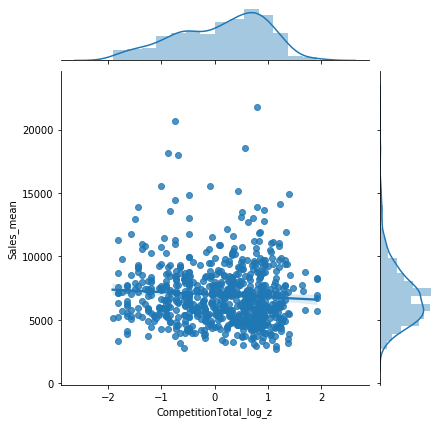

In [45]:
sns.jointplot(x=test_qwer['CompetitionTotal_log_z'],y=test_qwer['Sales_mean'],kind='reg')

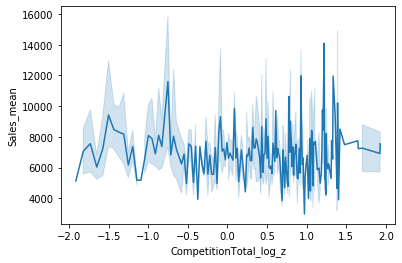

In [46]:
sns.lineplot(x=test_qwer['CompetitionTotal_log_z'],y=test_qwer['Sales_mean'])

In [47]:
def remove_slash(x):
    return x.replace('-','')

df['Date_int'] = df['Date']

df['Date_int'] = df['Date_int'].apply(remove_slash)

df['Date_int'] = pd.to_numeric(df['Date_int'])

In [48]:
df['Date_Year']  = df['Date_int']//10000
df['Date_Month'] = (df['Date_int']//100)%100
df['Date_Day']  = df['Date_int'] % 100

In [49]:
from random import *

df['CompetitionOpenSinceTotal'] = 100 * df['CompetitionOpenSinceYear'] + df['CompetitionOpenSinceMonth']

# There is no CompetitionOpenSinceDay. So I make this use random function
thirtyone = [1,3,5,7,8,10,12]
thirty = [4,6,9,11]
twentyeight = [2]

def randomday(x):
        if x % 100 in thirtyone:
            ran_num = randint(1,31)
            x = x * 100 + ran_num
        elif x % 100 in thirty:
            ran_num = randint(1,30)
            x = x * 100 + ran_num
        elif x % 100 in twentyeight:
            ran_num = randint(1,28)
            x = x * 100 + ran_num
        else: # Fill np.nan value to very big value. because I will make another variable to compare this and store data's date
            x = 99999999 
        return x

df['CompetitionOpenSinceTotal'] = df['CompetitionOpenSinceTotal'].apply(randomday)
df['CompetitionOpenSinceTotal'] = df['CompetitionOpenSinceTotal'].astype(int)

In [50]:
df['CompetitionOpenSinceTotal_Year']  = df['CompetitionOpenSinceTotal']//10000
df['CompetitionOpenSinceTotal_Month'] = (df['CompetitionOpenSinceTotal']//100)%100
df['CompetitionOpenSinceTotal_Day']  = df['CompetitionOpenSinceTotal'] % 100

In [51]:
Date_int = df['Date_int'].tolist()
CompetitionOpenSinceTotal = df['CompetitionOpenSinceTotal'].tolist()
IsCompetitor = []


for i in range(len(Date_int)):
    if Date_int[i] >=  CompetitionOpenSinceTotal[i]:
        IsCompetitor.append(1)
    elif Date_int[i] < CompetitionOpenSinceTotal[i]:
        IsCompetitor.append(0)

df['IsCompetitor'] = IsCompetitor

In [52]:
df.groupby('IsCompetitor')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
IsCompetitor,,,,,,,,
0,340977.0,6994.084536,3075.966528,0.0,4933.0,6409.0,8339.0,41551.0
1,503415.0,6929.389589,3122.935268,0.0,4808.0,6341.0,8374.0,38722.0


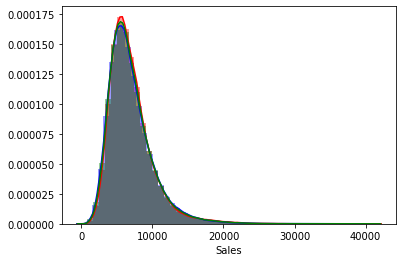

In [53]:
group1 = df[df['IsCompetitor'].isin([0])]
sns.distplot(group1["Sales"],color='red',label='IsntScholHoliday')

group2 = df[df['IsCompetitor'].isin([1])]
sns.distplot(group2["Sales"],color='blue',label='IsScholHoliday')

sns.distplot(df["Sales"],color='green',label='total')

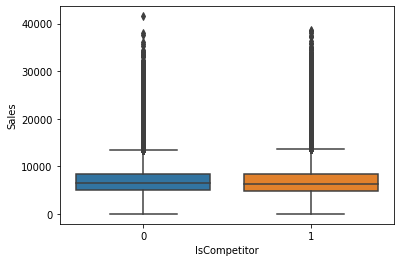

In [54]:
sns.boxplot(x=df["IsCompetitor"],y=df["Sales"])

In [55]:
group1 = df[df['IsCompetitor'].isin(['0'])]['Sales']
group2 = df[df['IsCompetitor'].isin(['1'])]['Sales']

F_statistic, pVal = stats.f_oneway(group1, group2)

print('Result : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Result : F=88.3, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


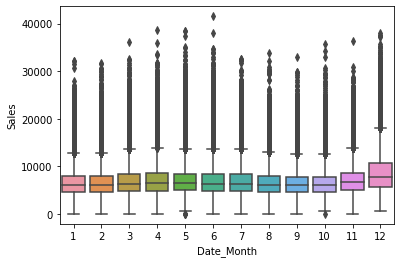

In [56]:
sns.boxplot(x=df["Date_Month"],y=df["Sales"])

In [57]:
import warnings
warnings.filterwarnings('ignore')

df_test = pd.DataFrame(df, columns=['Sales', 'Date_Month'])    

# the "C" indicates categorical data
model = ols('Sales ~ C(Date_Month)', df_test).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Date_Month),11.0,1.877934e+11,1.707213e+10,1813.507935,0.0
Residual,844380.0,7.948884e+12,9.413870e+06,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2   25.4751 0.8609  -23.6929   74.6431  False
     1      3  412.7216  0.001  364.4113  461.0319   True
     1      4   482.538  0.001  433.6025  531.4734   True
     1      5  542.7627  0.001  493.5725  591.9529   True
     1      6  437.2877  0.001  388.4811  486.0944   True
     1      7  388.9917  0.001  340.6259  437.3575   True
     1      8   85.2942  0.001   30.4098  140.1786   True
     1      9  -17.3474    0.9  -72.8978    38.203  False
     1     10   39.1529 0.4677  -16.0844   94.3902  False
     1     11  624.8638  0.001  569.0017  680.7259   True
     1     12 2045.2662  0.001  1989.055 2101.4774   True
     2      3  387.2465  0.001  338.0286  436.4644   True
     2      4  457.0629  0.001  407.2312  506.8946   True
     2      5  517.2876  0.001  467.2057  567.3696   True
     2      6 

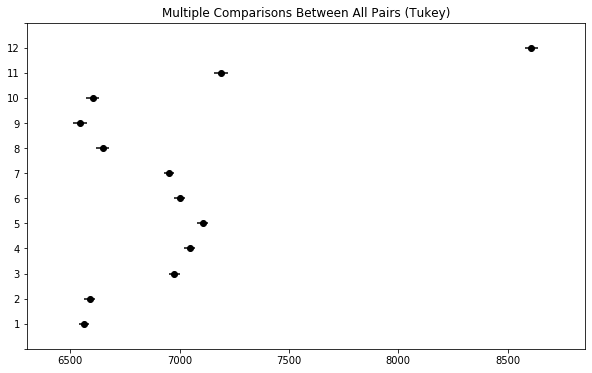

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df_test['Sales'], df_test['Date_Month'], alpha=0.05)
print(posthoc)

fig = posthoc.plot_simultaneous()

In [59]:
dummy5 = pd.get_dummies(df['Date_Month'],prefix='Date_Month')
df[['Date_Month_1','Date_Month_2','Date_Month_3','Date_Month_4',
         'Date_Month_5','Date_Month_6','Date_Month_7','Date_Month_8',
          'Date_Month_9','Date_Month_10','Date_Month_11','Date_Month_12'
         ]] = dummy5
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log,...,Date_Month_3,Date_Month_4,Date_Month_5,Date_Month_6,Date_Month_7,Date_Month_8,Date_Month_9,Date_Month_10,Date_Month_11,Date_Month_12
0,1,5,2015-07-31,5263,555,1,1,0,1,-0.437510,...,0,0,0,0,1,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,-0.547188,...,0,0,0,0,1,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,-0.659881,...,0,0,0,0,1,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,-0.551351,...,0,0,0,0,1,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,-0.094313,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,1,0,0,0.881221,...,0,0,0,0,0,0,0,0,0,0
844388,292,6,2013-01-05,2748,340,1,0,0,0,-1.945120,...,0,0,0,0,0,0,0,0,0,0
844389,292,5,2013-01-04,4202,560,1,0,0,1,-0.959868,...,0,0,0,0,0,0,0,0,0,0
844390,292,4,2013-01-03,4580,662,1,0,0,1,-0.760018,...,0,0,0,0,0,0,0,0,0,0


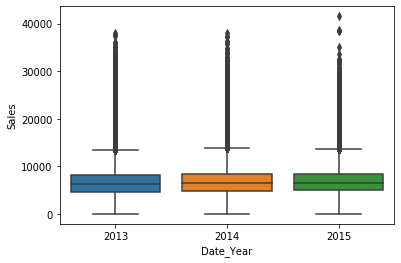

In [60]:
sns.boxplot(x=df["Date_Year"],y=df["Sales"])

In [61]:
import warnings
warnings.filterwarnings('ignore')

df_test = pd.DataFrame(df, columns=['Sales', 'Date_Year'])    

# the "C" indicates categorical data
model = ols('Sales ~ C(Date_Year)', df_test).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Date_Year),2.0,1.169399e+10,5.846995e+09,607.649064,1.954755e-264
Residual,844389.0,8.124983e+12,9.622323e+06,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  2013   2014 211.0122 0.001 192.9381 229.0863   True
  2013   2015 273.7346 0.001 253.0942 294.3751   True
  2014   2015  62.7224 0.001  41.7487  83.6961   True
-----------------------------------------------------


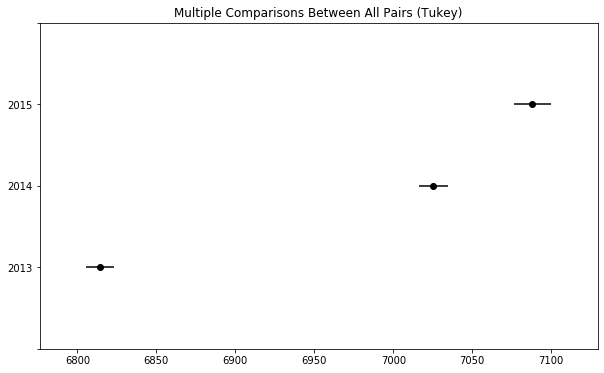

In [62]:
posthoc = pairwise_tukeyhsd(df_test['Sales'], df_test['Date_Year'], alpha=0.05)
print(posthoc)

fig = posthoc.plot_simultaneous()

In [63]:
dummy6 = pd.get_dummies(df['Date_Year'],prefix='Date_Year')
df[['Date_Year_1','Date_Year_2','Date_Year_3']] = dummy6
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log,...,Date_Month_6,Date_Month_7,Date_Month_8,Date_Month_9,Date_Month_10,Date_Month_11,Date_Month_12,Date_Year_1,Date_Year_2,Date_Year_3
0,1,5,2015-07-31,5263,555,1,1,0,1,-0.437510,...,0,1,0,0,0,0,0,0,0,1
1,1,4,2015-07-30,5020,546,1,1,0,1,-0.547188,...,0,1,0,0,0,0,0,0,0,1
2,1,3,2015-07-29,4782,523,1,1,0,1,-0.659881,...,0,1,0,0,0,0,0,0,0,1
3,1,2,2015-07-28,5011,560,1,1,0,1,-0.551351,...,0,1,0,0,0,0,0,0,0,1
4,1,1,2015-07-27,6102,612,1,1,0,1,-0.094313,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,1,0,0,0.881221,...,0,0,0,0,0,0,0,1,0,0
844388,292,6,2013-01-05,2748,340,1,0,0,0,-1.945120,...,0,0,0,0,0,0,0,1,0,0
844389,292,5,2013-01-04,4202,560,1,0,0,1,-0.959868,...,0,0,0,0,0,0,0,1,0,0
844390,292,4,2013-01-03,4580,662,1,0,0,1,-0.760018,...,0,0,0,0,0,0,0,1,0,0


In [64]:
df['IsPromo2'] = df['Promo2']
df['IsPromo2'] = df["Promo2SinceYear"].apply(lambda x: 1 if x >= 2013 else 0)

,count,mean,std,min,25%,50%,75%,max
IsPromo2,,,,,,,,
0,679303.0,7084.604896,3175.467027,0.0,4953.0,6482.0,8499.0,41551.0
1,165089.0,6424.336346,2728.434725,0.0,4517.0,5920.0,7768.0,31523.0


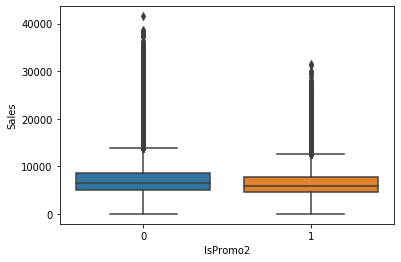

In [65]:
sns.boxplot(x=df["IsPromo2"],y=df["Sales"])

df.groupby('IsPromo2')['Sales'].describe()

In [66]:
import warnings
warnings.filterwarnings('ignore')

df_test = pd.DataFrame(df, columns=['Sales', 'IsPromo2'])    

# the "C" indicates categorical data
model = ols('Sales ~ C(IsPromo2)', df_test).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(IsPromo2),1.0,5.790003e+10,5.790003e+10,6051.683814,0.0
Residual,844390.0,8.078777e+12,9.567590e+06,NaN,NaN


In [67]:
df['Date_datetime'] = pd.to_datetime(df['Date'])

In [68]:
df_temp = df

In [69]:
df_temp=df_temp.set_index('Date_datetime')
Sales_predict=df_temp.groupby('Store')['Sales'].rolling(window='7D').mean()
Customer_predict=df_temp.groupby('Store')['Customers'].rolling(window='7D').mean()

In [70]:
Sales_predict = Sales_predict.reset_index()
Customer_predict = Customer_predict.reset_index()

In [71]:
Sales_predict['Date_datetime']=Sales_predict['Date_datetime']+pd.to_timedelta('7D')
Customer_predict['Date_datetime']=Customer_predict['Date_datetime']+pd.to_timedelta('7D')

In [72]:
df = df.merge(Sales_predict, on=['Store','Date_datetime'] , how='left')

In [73]:
df = df.merge(Customer_predict, on=['Store','Date_datetime'] , how='left')

In [74]:
df.rename(columns = {"Sales_y": "Sales_predict", "Customers_y": "Customers_predict"}, inplace = True)

In [75]:
df.rename(columns = {"Sales_x": "Sales", "Customers_x": "Customers"}, inplace = True)

In [76]:
df.tail(50)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log,...,Date_Month_10,Date_Month_11,Date_Month_12,Date_Year_1,Date_Year_2,Date_Year_3,IsPromo2,Date_datetime,Sales_predict,Customers_predict
844342,292,4,2013-02-28,5284,687,1,0,0,0,-0.428271,...,0,0,0,1,0,0,0,2013-02-28,5054.000000,669.166667
844343,292,3,2013-02-27,4692,652,1,0,0,0,-0.703963,...,0,0,0,1,0,0,0,2013-02-27,5258.166667,686.166667
844344,292,2,2013-02-26,4649,678,1,0,0,0,-0.725324,...,0,0,0,1,0,0,0,2013-02-26,5537.833333,712.166667
844345,292,1,2013-02-25,5371,764,1,0,0,0,-0.390380,...,0,0,0,1,0,0,0,2013-02-25,6105.333333,743.333333
844346,292,6,2013-02-23,2714,349,1,0,0,0,-1.974001,...,0,0,0,1,0,0,0,2013-02-23,6173.166667,749.166667
844347,292,5,2013-02-22,6488,783,1,1,0,0,0.048007,...,0,0,0,1,0,0,0,2013-02-22,5897.833333,723.833333
844348,292,4,2013-02-21,6410,789,1,1,0,0,0.019943,...,0,0,0,1,0,0,0,2013-02-21,5629.333333,711.333333
844349,292,3,2013-02-20,5917,754,1,1,0,0,-0.165746,...,0,0,0,1,0,0,0,2013-02-20,5498.666667,705.666667
844350,292,2,2013-02-19,6327,834,1,1,0,0,-0.010297,...,0,0,0,1,0,0,0,2013-02-19,5318.000000,684.166667
844351,292,1,2013-02-18,8776,951,1,1,0,0,0.748900,...,0,0,0,1,0,0,0,2013-02-18,4771.666667,655.166667


In [77]:
def nullchange(x,y):
    if pd.isnull(x):
        x = y
    return x

df["Sales_predict"] = df.apply(lambda x : nullchange(x["Sales_predict"], x["Sales"]) , axis = 1 )
df["Customers_predict"] = df.apply(lambda x : nullchange(x["Customers_predict"], x["Customers"]) , axis = 1 )

In [78]:
df[['Date_datetime','Sales','Sales_predict','Customers','Customers_predict']].tail(6)

,Date_datetime,Sales,Sales_predict,Customers,Customers_predict
844386,2013-01-08,6859,6859.0,792,792.0
844387,2013-01-07,9291,9291.0,1002,1002.0
844388,2013-01-05,2748,2748.0,340,340.0
844389,2013-01-04,4202,4202.0,560,560.0
844390,2013-01-03,4580,4580.0,662,662.0
844391,2013-01-02,5076,5076.0,672,672.0


In [79]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_log,...,Date_Month_10,Date_Month_11,Date_Month_12,Date_Year_1,Date_Year_2,Date_Year_3,IsPromo2,Date_datetime,Sales_predict,Customers_predict
0,1,5,2015-07-31,5263,555,1,1,0,1,-0.437510,...,0,0,0,0,0,1,0,2015-07-31,4830.833333,533.333333
1,1,4,2015-07-30,5020,546,1,1,0,1,-0.547188,...,0,0,0,0,0,1,0,2015-07-30,4622.333333,526.166667
2,1,3,2015-07-29,4782,523,1,1,0,1,-0.659881,...,0,0,0,0,0,1,0,2015-07-29,4402.666667,516.166667
3,1,2,2015-07-28,5011,560,1,1,0,1,-0.551351,...,0,0,0,0,0,1,0,2015-07-28,4160.500000,501.000000
4,1,1,2015-07-27,6102,612,1,1,0,1,-0.094313,...,0,0,0,0,0,1,0,2015-07-27,3876.000000,486.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,1,0,0,0.881221,...,0,0,0,1,0,0,0,2013-01-07,9291.000000,1002.000000
844388,292,6,2013-01-05,2748,340,1,0,0,0,-1.945120,...,0,0,0,1,0,0,0,2013-01-05,2748.000000,340.000000
844389,292,5,2013-01-04,4202,560,1,0,0,1,-0.959868,...,0,0,0,1,0,0,0,2013-01-04,4202.000000,560.000000
844390,292,4,2013-01-03,4580,662,1,0,0,1,-0.760018,...,0,0,0,1,0,0,0,2013-01-03,4580.000000,662.000000


In [80]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Sales_log', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'DayOfWeek_1',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'IsCompetitionDistance', 'Date_int', 'Date_Year',
       'Date_Month', 'Date_Day', 'CompetitionOpenSinceTotal',
       'CompetitionOpenSinceTotal_Year', 'CompetitionOpenSinceTotal_Month',
       'CompetitionOpenSinceTotal_Day', 'IsCompetitor', 'Date_Month_1',
       'Date_Month_2', 'Date_Month_3', 'Date_Month_4', 'Date_Month_5',
       'Date_Month_6', 'Dat

In [81]:
from sklearn import model_selection
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_data = df[['Promo','SchoolHoliday',  'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'DayOfWeek_1',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7', 
          'CompetitionDistance', 
       'Assortment_a', 'Assortment_b','Assortment_c', 'StoreType_a', 
       'StoreType_b', 'StoreType_c','StoreType_d', 
       'IsCompetitionDistance', 
      # 'IsCompetitor', 
       'Date_Month_1','Date_Month_2', 'Date_Month_3', 'Date_Month_4', 'Date_Month_5',
       'Date_Month_6', 'Date_Month_7', 'Date_Month_8', 'Date_Month_9',
       'Date_Month_10', 'Date_Month_11', 'Date_Month_12', 
       'Date_Year_1','Date_Year_2', 'Date_Year_3', 
             'IsPromo2','Sales_predict', 'Customers_predict']]

y_data = df['Sales']
x_data['intercept'] = 1


x_train =  df.loc[(df["Date_Year"] != 2015)  , :]
x_train =  x_train[['Promo','SchoolHoliday',  'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'DayOfWeek_1',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7', 
          'CompetitionDistance', 
       'Assortment_a', 'Assortment_b','Assortment_c', 'StoreType_a', 
       'StoreType_b', 'StoreType_c','StoreType_d', 
       'IsCompetitionDistance', 
     #   'IsCompetitor', 
       'Date_Month_1','Date_Month_2', 'Date_Month_3', 'Date_Month_4', 'Date_Month_5',
       'Date_Month_6', 'Date_Month_7', 'Date_Month_8', 'Date_Month_9',
       'Date_Month_10', 'Date_Month_11', 'Date_Month_12', 
       'Date_Year_1','Date_Year_2', 'Date_Year_3', 
             'IsPromo2','Sales_predict', 'Customers_predict']]
x_train['intercept'] = 1


y_train =  df.loc[(df["Date_Year"] != 2015) , :]
y_train =  y_train['Sales']


x_test1 =  df.loc[(df["Date_Year"] == 2015)  , :]
x_test =  x_test1[['Promo','SchoolHoliday',  'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'DayOfWeek_1',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7', 
          'CompetitionDistance', 
       'Assortment_a', 'Assortment_b','Assortment_c', 'StoreType_a', 
       'StoreType_b', 'StoreType_c','StoreType_d', 
       'IsCompetitionDistance', 
     #   'IsCompetitor', 
       'Date_Month_1','Date_Month_2', 'Date_Month_3', 'Date_Month_4', 'Date_Month_5',
       'Date_Month_6', 'Date_Month_7', 'Date_Month_8', 'Date_Month_9',
       'Date_Month_10', 'Date_Month_11', 'Date_Month_12', 
       'Date_Year_1','Date_Year_2', 'Date_Year_3', 
             'IsPromo2','Sales_predict', 'Customers_predict']]
x_test['intercept'] = 1


y_test =  df.loc[(df["Date_Year"] == 2015), :]
y_test =  y_test['Sales']

model = LinearRegression()
model.fit(x_train, y_train)

y_predict_linear = model.predict(x_test)
score_linear = model.score(x_test, y_test)

mse_linear = mean_squared_error(y_true=y_test,y_pred=y_predict_linear)


print(score_linear)
print(mse_linear)

0.7423606059603317
2371969.865004952


In [82]:
lm = sm.OLS(y_data, x_data)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 6.922e+04
Date:                Wed, 07 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:00:29   Log-Likelihood:            -7.4253e+06
No. Observations:              844392   AIC:                         1.485e+07
Df Residuals:                  844357   BIC:                         1.485e+07
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Promo                  2097.4454      3.863    542.972      0.000    2089.874    2105.017
SchoolHoliday           207.8818      4.988     41.675      0.000     198.105     217.658
StateHoliday_0          274.7051     54.053      5.082      0.000     168.763     380.647
StateHoliday_a          408.9375     70.097      5.834      0.000     271.550     546.325
StateHoliday_b         -956.0613    112.266     -8.516      0.000   -1176.098    -736.024
StateHoliday_c         -153.7688    150.807     -1.020      0.308    -449.345     141.808
DayOfWeek_1             806.7329      6.842    117.902      0.000     793.322     820.144
DayOfWeek_2            -190.6227      6.824    -27.934      0.000    -203.997    -177.248
DayOfWeek_3            -512.1081      6.818    -75.115      0.000    -525.470    -498.746
DayOfWeek_4            -438.1873      6.838    -64.080      0.000    -451.590    -424.785
DayOfWeek_5             -70.6086      6.818    -10.357      0.000     -83.971     -57.246
DayOfWeek_6            -198.7133      6.955    -28.573      0.000    -212.344    -185.082
DayOfWeek_7             177.3194     24.690      7.182      0.000     128.927     225.712
CompetitionDistance       0.0041      0.000     17.399      0.000       0.004       0.005
Assortment_a            241.0990     12.601     19.134      0.000     216.402     265.796
Assortment_b          -1078.8527     20.704    -52.108      0.000   -1119.432   -1038.273
Assortment_c            411.5662     12.824     32.094      0.000     386.432     436.700
StoreType_a            -107.6989      9.379    -11.483      0.000    -126.082     -89.316
StoreType_b            -330.6533     16.957    -19.499      0.000    -363.889    -297.417
StoreType_c            -151.4824      9.884    -15.325      0.000    -170.856    -132.109
StoreType_d             163.6470      9.903     16.525      0.000     144.237     183.057
IsCompetitionDistance   206.0245     34.232      6.018      0.000     138.930     273.119
Date_Month_1           -125.2159      5.844    -21.427      0.000    -136.670    -113.762
Date_Month_2            -79.4612      6.017    -13.206      0.000     -91.255     -67.668
Date_Month_3            128.1914      5.866     21.853      0.000     116.694     139.689
Date_Month_4            -46.3771      5.929     -7.822      0.000     -57.998     -34.757
Date_Month_5           -126.9434      6.007    -21.132      0.000    -138.717    -115.170
Date_Month_6            -38.1821      5.949     -6.418      0.000     -49.842     -26.522
Date_Month_7            -55.6740      6.007     -9.268      0.000     -67.448     -43.900
Date_Month_8           -301.9467      7.348    -41.095      0.000    -316.348    -287.546
Date_Month_9            -74.4878      7.142    -10.430      0.000     -88.485     -60.491
Date_Month_10          

In [83]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10, 30, 50, 70, 100, 1000]

# Ridge Regression

for a in alphas:
    model = Ridge(alpha=a).fit(x_train,y_train)
    score = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.74, MSE:2371969.86, RMSE:1540.12
Alpha:0.0010, R2:0.74, MSE:2371969.86, RMSE:1540.12
Alpha:0.0100, R2:0.74, MSE:2371969.86, RMSE:1540.12
Alpha:0.1000, R2:0.74, MSE:2371969.82, RMSE:1540.12
Alpha:0.3000, R2:0.74, MSE:2371969.74, RMSE:1540.12
Alpha:0.5000, R2:0.74, MSE:2371969.67, RMSE:1540.12
Alpha:0.7000, R2:0.74, MSE:2371969.59, RMSE:1540.12
Alpha:1.0000, R2:0.74, MSE:2371969.48, RMSE:1540.12
Alpha:3.0000, R2:0.74, MSE:2371968.81, RMSE:1540.12
Alpha:5.0000, R2:0.74, MSE:2371968.27, RMSE:1540.12
Alpha:7.0000, R2:0.74, MSE:2371967.84, RMSE:1540.12
Alpha:10.0000, R2:0.74, MSE:2371967.39, RMSE:1540.12
Alpha:30.0000, R2:0.74, MSE:2371968.34, RMSE:1540.12
Alpha:50.0000, R2:0.74, MSE:2371972.50, RMSE:1540.12
Alpha:70.0000, R2:0.74, MSE:2371977.29, RMSE:1540.12
Alpha:100.0000, R2:0.74, MSE:2371983.48, RMSE:1540.12
Alpha:1000.0000, R2:0.74, MSE:2371819.67, RMSE:1540.07


In [84]:
ridge_cv=RidgeCV(alphas=alphas, cv=5)
model = ridge_cv.fit(x_train, y_train)
print(model.alpha_)

1000.0


In [85]:
ridge=Ridge(alpha=1000).fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
score_ridge = ridge.score(x_test, y_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
.format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

Final Result: Ridge R2:0.742, MSE:2371819.67, RMSE:1540.07


In [86]:
for a in alphas:
    model = Lasso(alpha=a).fit(x_train,y_train)
    score = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.74, MSE:2369965.26, RMSE:1539.47
Alpha:0.0010, R2:0.74, MSE:2369966.63, RMSE:1539.47
Alpha:0.0100, R2:0.74, MSE:2369967.72, RMSE:1539.47
Alpha:0.1000, R2:0.74, MSE:2370001.26, RMSE:1539.48
Alpha:0.3000, R2:0.74, MSE:2370082.68, RMSE:1539.51
Alpha:0.5000, R2:0.74, MSE:2369981.63, RMSE:1539.47
Alpha:0.7000, R2:0.74, MSE:2369854.20, RMSE:1539.43
Alpha:1.0000, R2:0.74, MSE:2369768.93, RMSE:1539.41
Alpha:3.0000, R2:0.74, MSE:2370089.97, RMSE:1539.51
Alpha:5.0000, R2:0.74, MSE:2374141.93, RMSE:1540.83
Alpha:7.0000, R2:0.74, MSE:2380099.78, RMSE:1542.76
Alpha:10.0000, R2:0.74, MSE:2391369.76, RMSE:1546.41
Alpha:30.0000, R2:0.74, MSE:2419078.11, RMSE:1555.34
Alpha:50.0000, R2:0.73, MSE:2440008.51, RMSE:1562.05
Alpha:70.0000, R2:0.73, MSE:2456454.54, RMSE:1567.31
Alpha:100.0000, R2:0.73, MSE:2496897.21, RMSE:1580.16
Alpha:1000.0000, R2:0.60, MSE:3654524.29, RMSE:1911.68


In [87]:
lasso_cv=LassoCV(alphas=alphas, cv=5)
model = lasso_cv.fit(x_train, y_train)
print(model.alpha_)

1.0


In [88]:
lasso=Lasso(alpha=1).fit(x_train, y_train)
y_pred_lasso= ridge.predict(x_test)
score_lasso = ridge.score(x_test, y_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Final Result: Lasso R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
.format(score_lasso, mse_lasso, np.sqrt(mse_lasso)))

Final Result: Lasso R2:0.742, MSE:2371819.67, RMSE:1540.07


In [89]:
print("Final Result: Linear R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
.format(score_linear, mse_linear, np.sqrt(mse_linear)))

print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
.format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

print("Final Result: Lasso R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
.format(score_lasso, mse_lasso, np.sqrt(mse_lasso)))


Final Result: Linear R2:0.742, MSE:2371969.87, RMSE:1540.12
Final Result: Ridge R2:0.742, MSE:2371819.67, RMSE:1540.07
Final Result: Lasso R2:0.742, MSE:2371819.67, RMSE:1540.07


In [90]:
Final_predict_sales = y_pred_ridge

final = x_test1[['Date','Store','Sales','Sales_predict']]
final['Final_Sales_Predict'] = Final_predict_sales

final


,Date,Store,Sales,Sales_predict,Final_Sales_Predict
0,2015-07-31,1,5263,4830.833333,6291.993077
1,2015-07-30,1,5020,4622.333333,5786.626566
2,2015-07-29,1,4782,4402.666667,5533.189485
3,2015-07-28,1,5011,4160.500000,5667.682977
4,2015-07-27,1,6102,3876.000000,6485.255962
...,...,...,...,...,...
843779,2015-01-07,292,6227,5525.200000,6388.279729
843780,2015-01-06,292,7199,5336.200000,6531.333826
843781,2015-01-05,292,8814,4866.400000,7152.089162
843782,2015-01-03,292,2666,4984.000000,4093.721405


In [91]:
final[['Sales','Sales_predict','Final_Sales_Predict']].describe()

,Sales,Sales_predict,Final_Sales_Predict
count,196032.000000,196032.000000,196032.000000
mean,7088.126648,7072.443216,7021.392785
std,3034.237397,2653.816217,2593.883813
min,0.000000,0.000000,-283.290816
25%,5042.000000,5289.500000,5251.678303
50%,6530.000000,6609.500000,6735.533713
75%,8486.000000,8248.446429,8339.652358
max,41551.000000,32228.000000,28428.013513


Text(0.5, 1.0, 'Predict Sales using ridge regression')

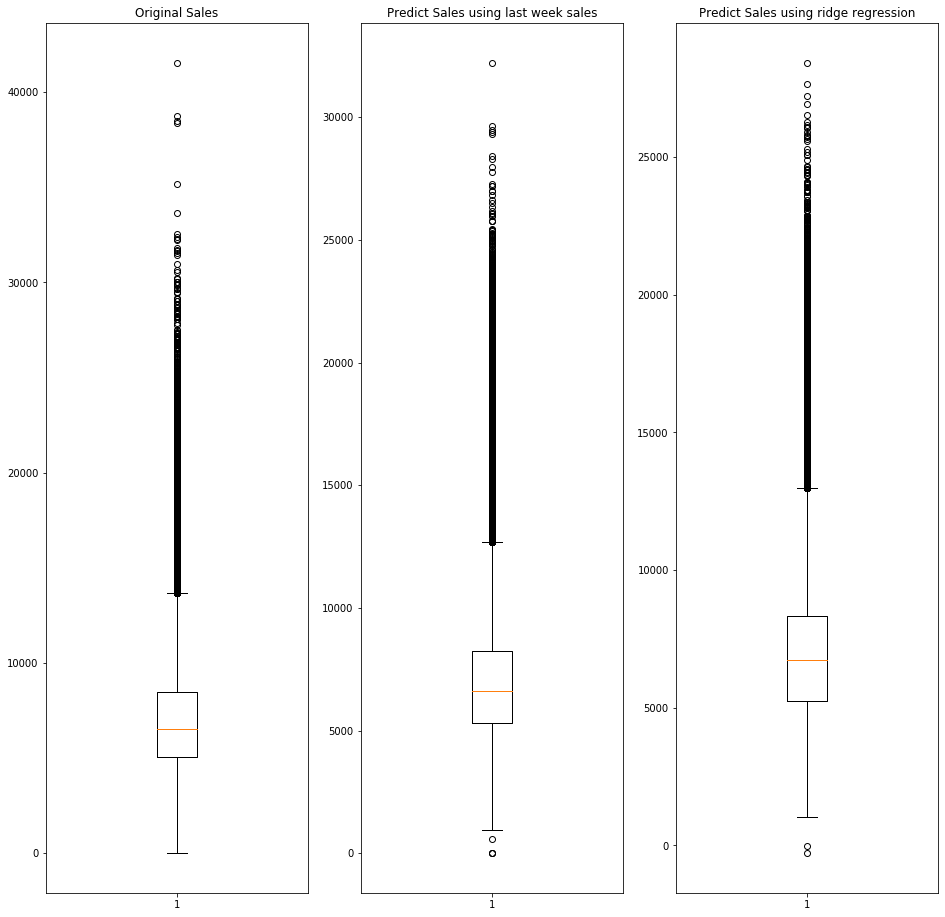

In [92]:
plt.figure(figsize=(16,16))

plt.subplot(131)
plt.boxplot(final['Sales'])
plt.title('Original Sales')

plt.subplot(132)
plt.boxplot(final['Sales_predict'])
plt.title('Predict Sales using last week sales')

plt.subplot(133)
plt.boxplot(final['Final_Sales_Predict'])
plt.title('Predict Sales using ridge regression')